In [1]:
!pip install oddt
!pip install rdkit-pypi

     |████████████████████████████████| 2.3 MB 5.1 MB/s 
     |████████████████████████████████| 47 kB 3.5 MB/s 
  Created wheel for oddt: filename=oddt-0.7-py2.py3-none-any.whl size=2409559 sha256=5e0d208aaf24887a088d29ffc6888fb50f7eb68228044f3672bcd362fa2bd13d
  Stored in directory: /root/.cache/pip/wheels/d6/43/d5/d9cd8676d2d1bf10e0becb3f75d52b8ff354fdd691974524c0
Successfully built oddt
     |████████████████████████████████| 19.7 MB 1.3 MB/s 


In [2]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True  #< set this to False if you want PNGs instead of SVGs

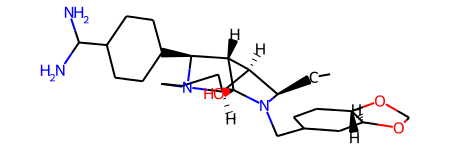

In [3]:
ref_mol = "/content/ligand.pdbqt"
lines = []
with open(ref_mol, 'r') as f:
    for line in f.readlines():
        if 'ATOM' in line or 'HETATM' in line:
            lines.append(line[:-3] + '\n')
        else:
            lines.append(line)
ref_mol = Chem.MolFromPDBBlock(''.join(lines))
ref_mol

In [4]:
import re
SECTION_START = re.compile(r'^MODEL')
SECTION_END = re.compile(r'^ENDMDL')
out_mol = "/content/ligand_out.pdbqt"
with open(out_mol, 'r') as f:
  t = f.readlines()
out_mol = []
ind = 0
f = open(str(ind)+'.pdbqt', 'wt+')
out_mol.append(str(ind)+'.pdbqt')
for line in t:
  f.write(line)
  if SECTION_END.match(line):
    f.close()
    ind += 1
    f = open(str(ind)+'.pdbqt', 'wt+')
    out_mol.append(str(ind)+'.pdbqt')

prb_mol = []
for mol in out_mol:
  lines = []
  with open(mol, 'r') as f:
      for line in f.readlines():
          if 'ATOM' in line or 'HETATM' in line:
              lines.append(line[:-3] + '\n')
          else:
              lines.append(line)
  if len(lines):
    prb_mol.append(Chem.MolFromPDBBlock(''.join(lines)))

molecule: 1.9501774312868843
molecule: 2.100276644699596
molecule: 1.361279840145064
molecule: 1.328494391022868
molecule: 0.7682880108196796


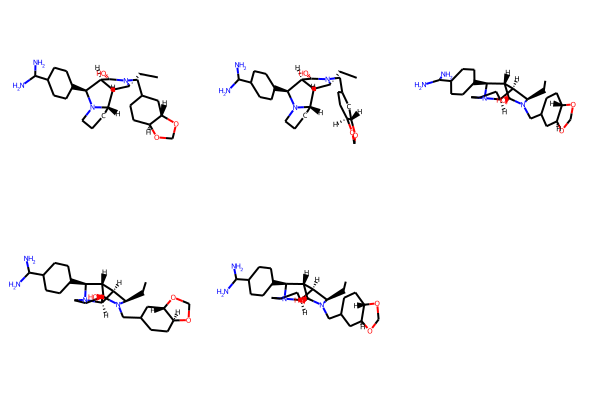

In [5]:
from rdkit.Chem import AllChem, rdMolAlign

grid = []
for mol in prb_mol:
  mol_2 = AllChem.AssignBondOrdersFromTemplate(ref_mol, mol)
  grid.append([mol, mol_2, rdMolAlign.AlignMol(mol, ref_mol)])
  print(f'molecule: {grid[-1][2]}')

Draw.MolsToGridImage(prb_mol)

In [6]:
grid.sort(key=lambda grid: grid[2])
grid

[[<rdkit.Chem.rdchem.Mol at 0x7f11792fe120>,
  0.7682880108196796],
  1.328494391022868],
  1.361279840145064],
  1.9501774312868843],
  2.100276644699596]]